<a href="https://colab.research.google.com/github/PallaviSriramula/laptop-price-prediction/blob/main/Laptop_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Laptop price prediction/Laptop.csv')
df

,Unnamed: 0,Brand,Model,Series,Processor,Processor_Gen,RAM,Hard_Disk_Capacity,OS,Rating,Price
0,0,DELL,Inspiron,NaN,i3,11th,8.0,1 TB HDD,Windows 11 Home,3.7,39040
1,1,DELL,Vostro,NaN,i5,11th,8.0,1 TB HDD,Windows 10 Home,3.6,50840
2,2,ASUS,VivoBook,15,i3,10th,8.0,512 GB SSD,Windows 11 Home,4.3,37940
3,3,DELL,Inspiron,NaN,i3,11th,8.0,1 TB HDD,256 GB SSD,4.4,44440
4,4,ASUS,TUF,Gaming,i5,10th,8.0,512 GB SSD,Windows 10 Home,4.5,57940
...,...,...,...,...,...,...,...,...,...,...,...
125,125,DELL,Inspiron,NaN,i3,11th,8.0,1 TB HDD,Windows 11 Home,3.7,39040
126,126,HP,15q,NaN,i3,7th,4.0,1 TB HDD,DOS,4.2,32905
127,127,Lenovo,v15,NaN,i3,10th,4.0,1 TB HDD,DOS,3.1,39949
128,128,ASUS,Vivobook,15,i3,11th,8.0,1 TB HDD,Windows 10 Home,2.9,42750


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          130 non-null    int64  
 1   Brand               130 non-null    object 
 2   Model               116 non-null    object 
 3   Series              80 non-null     object 
 4   Processor           123 non-null    object 
 5   Processor_Gen       123 non-null    object 
 6   RAM                 122 non-null    float64
 7   Hard_Disk_Capacity  122 non-null    object 
 8   OS                  122 non-null    object 
 9   Rating              130 non-null    float64
 10  Price               130 non-null    int64  
dtypes: float64(2), int64(2), object(7)
memory usage: 11.3+ KB


In [ ]:
df.describe()

,Unnamed: 0,RAM,Rating,Price
count,130.000000,122.000000,130.000000,130.000000
mean,64.500000,8.622951,4.185385,53962.476923
std,37.671829,3.253296,0.364960,21369.679452
min,0.000000,4.000000,2.900000,17640.000000
25%,32.250000,8.000000,4.100000,39052.500000
50%,64.500000,8.000000,4.300000,46940.000000
75%,96.750000,8.000000,4.400000,61565.000000
max,129.000000,16.000000,4.800000,129990.000000


In [ ]:
df.isna().sum()

,0
Unnamed: 0,0
Brand,0
Model,14
Series,50
Processor,7
Processor_Gen,7
RAM,8
Hard_Disk_Capacity,8
OS,8
Rating,0


In [ ]:
df.head()

,Unnamed: 0,Brand,Model,Series,Processor,Processor_Gen,RAM,Hard_Disk_Capacity,OS,Rating,Price
0,0,DELL,Inspiron,NaN,i3,11th,8.0,1 TB HDD,Windows 11 Home,3.7,39040
1,1,DELL,Vostro,NaN,i5,11th,8.0,1 TB HDD,Windows 10 Home,3.6,50840
2,2,ASUS,VivoBook,15,i3,10th,8.0,512 GB SSD,Windows 11 Home,4.3,37940
3,3,DELL,Inspiron,NaN,i3,11th,8.0,1 TB HDD,256 GB SSD,4.4,44440
4,4,ASUS,TUF,Gaming,i5,10th,8.0,512 GB SSD,Windows 10 Home,4.5,57940


In [ ]:
df.shape

(130, 11)

In [ ]:
df.columns

Index(['Unnamed: 0', 'Brand', 'Model', 'Series', 'Processor', 'Processor_Gen',
       'RAM', 'Hard_Disk_Capacity', 'OS', 'Rating', 'Price'],
      dtype='object')

In [ ]:
df['Price'].value_counts()

,count
Price,
39040,10
40940,5
59940,5
39940,4
50840,4
...,...
46840,1
41340,1
32905,1


In [ ]:
df = df.drop([df.columns[0]],axis=1)
df

,Brand,Model,Series,Processor,Processor_Gen,RAM,Hard_Disk_Capacity,OS,Rating,Price
0,DELL,Inspiron,NaN,i3,11th,8.0,1 TB HDD,Windows 11 Home,3.7,39040
1,DELL,Vostro,NaN,i5,11th,8.0,1 TB HDD,Windows 10 Home,3.6,50840
2,ASUS,VivoBook,15,i3,10th,8.0,512 GB SSD,Windows 11 Home,4.3,37940
3,DELL,Inspiron,NaN,i3,11th,8.0,1 TB HDD,256 GB SSD,4.4,44440
4,ASUS,TUF,Gaming,i5,10th,8.0,512 GB SSD,Windows 10 Home,4.5,57940
...,...,...,...,...,...,...,...,...,...,...
125,DELL,Inspiron,NaN,i3,11th,8.0,1 TB HDD,Windows 11 Home,3.7,39040
126,HP,15q,NaN,i3,7th,4.0,1 TB HDD,DOS,4.2,32905
127,Lenovo,v15,NaN,i3,10th,4.0,1 TB HDD,DOS,3.1,39949
128,ASUS,Vivobook,15,i3,11th,8.0,1 TB HDD,Windows 10 Home,2.9,42750


In [ ]:
df=df.fillna(df.mode())
df.isna().sum()

,0
Brand,0
Model,14
Series,49
Processor,7
Processor_Gen,7
RAM,8
Hard_Disk_Capacity,8
OS,8
Rating,0
Price,0


In [ ]:
import matplotlib.pyplot as plt
import plotly.express as px
fig=px.histogram(df,x='Price')
fig.show()

In [ ]:
X = df.drop(['Price'],axis=1)
y = df['Price']
print(X.head())

  Brand     Model  Series Processor Processor_Gen  RAM Hard_Disk_Capacity  \
0  DELL  Inspiron       3        i3          11th  8.0           1 TB HDD   
1  DELL    Vostro     NaN        i5          11th  8.0           1 TB HDD   
2  ASUS  VivoBook      15        i3          10th  8.0         512 GB SSD   
3  DELL  Inspiron     NaN        i3          11th  8.0           1 TB HDD   
4  ASUS       TUF  Gaming        i5          10th  8.0         512 GB SSD   

                OS  Rating  
0  Windows 11 Home     3.7  
1  Windows 10 Home     3.6  
2  Windows 11 Home     4.3  
3       256 GB SSD     4.4  
4  Windows 10 Home     4.5  


In [ ]:
print(y.head())

0    39040
1    50840
2    37940
3    44440
4    57940
Name: Price, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split
train_X,test_X,train_y,test_y=train_test_split(X,y,test_size=0.2,random_state=100)
train_X.head()

,Brand,Model,Series,Processor,Processor_Gen,RAM,Hard_Disk_Capacity,OS,Rating
26,ASUS,VivoBook,15,i7,10th,16.0,512 GB SSD,Windows 11 Home,4.1
97,HP,Pavilion,Gaming,i7,11th,16.0,512 GB SSD,Windows 10 Home,4.4
74,DELL,NaN,NaN,i7,11th,16.0,512 GB SSD,Windows 11 Home,4.4
84,ASUS,VivoBook,15,i3,10th,4.0,1 TB HDD,Windows 10 Home,3.7
89,ASUS,Chromebook,Celeron,-,(4,4.0,64 GB EMMC Storage,Chrome OS,4.2


In [ ]:
train_y.head()

,Price
26,57940
97,98140
74,88940
84,31940
89,23490


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# Create a dictionary to store the fitted label encoders
label_encoders = {}

# Fit and transform each categorical column and save the encoder
for col in ['Brand', 'Model', 'Series', 'Processor', 'Processor_Gen', 'RAM', 'Hard_Disk_Capacity', 'OS', 'Rating']:
    label_encoders[col] = LabelEncoder()
    train_X[col] = label_encoders[col].fit_transform(train_X[col])

print(train_X.head())

    Brand  Model  Series  Processor  Processor_Gen  RAM  Hard_Disk_Capacity  \
26      1     24       2         16              3    2                   5   
97      3     17      15         16              4    2                   5   
74      2     29      28         16              4    2                   5   
84      1     24       2         14              3    0                   0   
89      1      6      10          0              0    0                   6   

    OS  Rating  
26   5       7  
97   4      10  
74   5      10  
84   4       4  
89   1       8  


In [ ]:
print(train_y.head())

26    57940
97    98140
74    88940
84    31940
89    23490
Name: Price, dtype: int64


In [ ]:
# Apply the saved label encoders to the test data
for col in test_X.columns:
    if col in label_encoders:
        test_X[col] = label_encoders[col].transform(test_X[col])


**LINEAR REGRESSION**

In [ ]:
from sklearn.linear_model import LinearRegression

model_lr=LinearRegression()
model_lr.fit(train_X,train_y)

LinearRegression()

In [ ]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error,accuracy_score
y_pred_train_lr = model_lr.predict(train_X)
y_pred_test_lr = model_lr.predict(test_X)
train_mse_lr = mean_squared_error(train_y,y_pred_train_lr)
test_mse_lr = mean_squared_error(test_y,y_pred_test_lr)
train_r2_lr = r2_score(train_y,y_pred_train_lr)
test_r2_lr = r2_score(test_y,y_pred_test_lr)
train_mae_lr = mean_absolute_error(train_y,y_pred_train_lr)
test_mae_lr = mean_absolute_error(train_y,y_pred_train_lr)
print(train_mse_lr)
print(test_mse_lr)
print(train_r2_lr)
print(test_r2_lr)
print(train_mae_lr)
print(test_mae_lr)

133458440.22076607
297097394.9503465
0.7058016387362203
0.34149106000610274
8938.594193430314
8938.594193430314


**DECISION TREE**

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

In [ ]:
#call the model
dt = DecisionTreeClassifier(criterion='entropy')
#fit the model
dt.fit(train_X,train_y)
#predit the model
y_pred_test_dt = dt.predict(test_X)
y_pred_train_dt = dt.predict(train_X)

In [ ]:
accuracy_train = accuracy_score(train_y,y_pred_train_dt)
print("Accuracy of the decision tree model on your train dataset is:",accuracy_train)
accuracy_test = accuracy_score(test_y,y_pred_test_dt)
print("Accuracy of the decision tree model on your test dataset is:",accuracy_test)

Accuracy of the decision tree model on your train dataset is: 0.9711538461538461
Accuracy of the decision tree model on your test dataset is: 0.0


**RandomForest Regressor**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(train_X, train_y)

RandomForestRegressor()

Mean Squared Error: 438380754.58313286
R^2 Score: 0.02834002949601777
Predicted Prices: [33598.79       43971.51285714 35485.43       34083.33
 36150.78       39660.19       33199.95       40398.79
 33199.95       39763.09       34518.12       30370.46
 34083.33       35990.         32767.11       37049.97
 34408.76       40439.49       39870.28       35337.53
 59233.8752381  59233.8752381  27044.62       33733.82
 44989.97       59881.32857143]


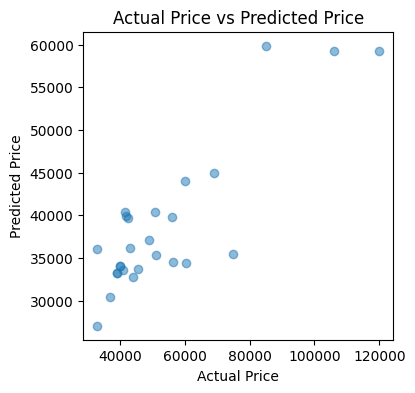

In [ ]:
# Predicting using the test data
y_pred = rf.predict(test_X)

# Evaluating the model
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(test_y, y_pred)
r2 = r2_score(test_y, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# Printing the predictions
print("Predicted Prices:", y_pred)

# Ploting the actual vs predicted prices
import matplotlib.pyplot as plt

plt.figure(figsize=(4,4))
plt.scatter(test_y, y_pred, alpha=0.5)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price vs Predicted Price')
plt.show()

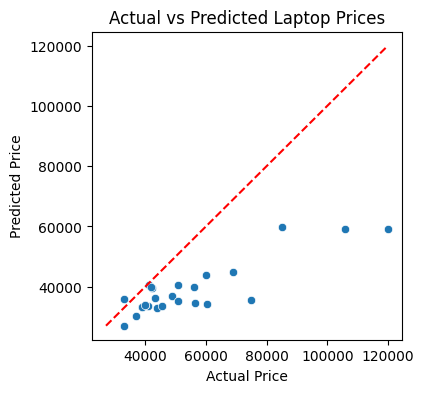

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Predict
y_pred = rf.predict(test_X)

test_y_actual = test_y

# Plot predicted vs actual
plt.figure(figsize=(4,4))
sns.scatterplot(x=test_y_actual, y=y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Laptop Prices")

# Draw identity line (ideal prediction line)
min_val = min(test_y_actual.min(), y_pred.min())
max_val = max(test_y_actual.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--')

plt.show()


In [ ]:
# --- PREDICT PRICE FOR NEW LAPTOP ---
new_laptop = {
    'Brand': 'HP',
    'Model': 'Pavilion',
    'Series': '15-ec1052AX',
    'Processor': 'Ryzen 5',
    'Processor_Gen': '5th Gen',
    'RAM': '8 GB',
    'Hard_Disk_Capacity': '512 GB SSD',
    'OS': 'Windows 11',
    'Rating': 4.3
}

# Convert to DataFrame
new_df = pd.DataFrame([new_laptop])

# Apply label encoding
for col in new_df.columns:
    if col in label_encoders:
        if new_df[col].iloc[0] in label_encoders[col].classes_:
            new_df[col] = label_encoders[col].transform(new_df[col])
        else:
            # Handle unseen labels
            le = label_encoders[col]
            new_classes = np.append(le.classes_, new_df[col].iloc[0])
            le.classes_ = new_classes
            new_df[col] = le.transform(new_df[col])

# Predict price (excluding 'Rating')
predicted_price = rf.predict(new_df)[0]

print(f" Predicted Laptop Price: ₹ {predicted_price:,.2f}")

 Predicted Laptop Price: ₹ 107,725.77
